In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [7]:
datasets, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [9]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [10]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

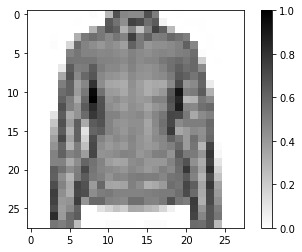

In [11]:
for image, label in test_dataset.take(1):
      break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

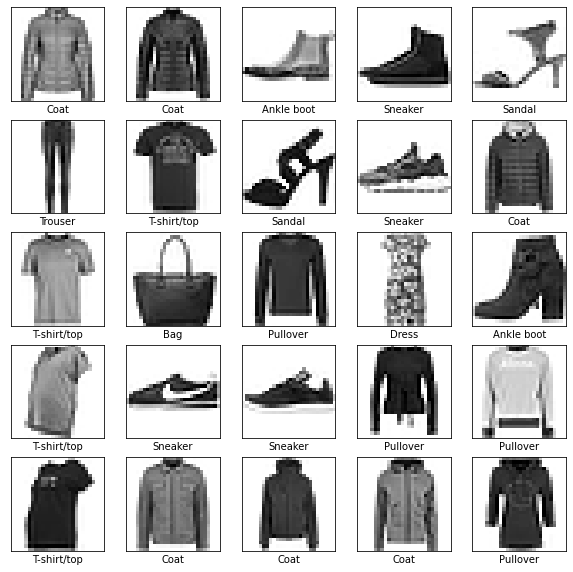

In [12]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [18]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), padding='same',activation=tf.nn.relu,input_shape=(28, 28, 1)),
                            tf.keras.layers.MaxPooling2D((2,2), strides=2),
                            tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
                            tf.keras.layers.MaxPooling2D((2,2), strides=2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation = tf.nn.relu),
                            tf.keras.layers.Dense(10)
                           ]
                          )

In [19]:
model.compile(optimizer = 'Adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [20]:
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(32)
test_dataset = test_dataset.cache().batch(32)

In [23]:
model.fit(train_dataset, epochs = 10, steps_per_epoch=math.ceil(num_train_examples/32))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3074 - accuracy: 0.8900
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2370 - accuracy: 0.9136
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2003 - accuracy: 0.9262
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1712 - accuracy: 0.9361
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1465 - accuracy: 0.9463
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1232 - accuracy: 0.9544
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1058 - accuracy: 0.9600
Epoch 8/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0851 - accuracy: 0.9691
Epoch 9/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0719 - accuracy: 0.9729
Epoch 10/10
1875/1875 [====================

In [24]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.3178 - accuracy: 0.9219
Accuracy on test dataset: 0.9219


In [25]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [26]:
predictions.shape

(32, 10)

In [27]:
predictions[0]

array([-10.431365 , -18.94832  ,   2.1048257,  -9.909117 ,  12.929844 ,
       -13.686179 ,   6.5567   , -22.826311 , -11.843471 , -14.047758 ],
      dtype=float32)

In [28]:
np.argmax(predictions[0])

4

In [29]:
test_labels[0]

4

In [30]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

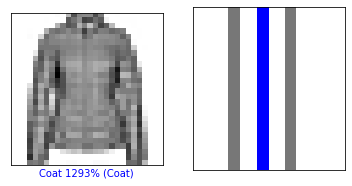

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

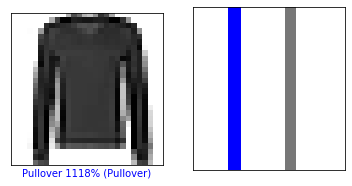

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

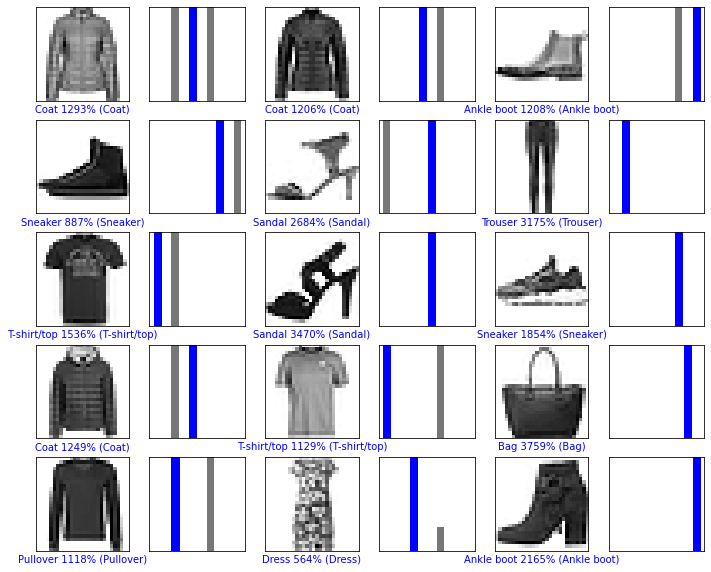

In [33]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [34]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [35]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [36]:
predictions_single = model.predict(img)

print(predictions_single)

[[-10.431359  -18.948324    2.1048257  -9.909116   12.929842  -13.686179
    6.5566998 -22.82631   -11.843471  -14.047755 ]]


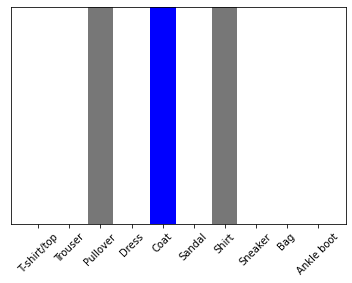

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

4